<a href="https://colab.research.google.com/github/eliotte0106/Data_Analyze-and-Image_Process/blob/main/Web_Crawling/Review_Crawling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Frame

In [3]:
import pandas as pd
def get_summary(review_list):
  star_list = []
  good_list = []
  bad_list = []

  for review in review_list:
    star_list.append(int(review.star))
    good_list.append(int(review.good))
    bad_list.append(int(review.bad))

  star_series = pd.Series(star_list)
  good_series = pd.Series(good_list)
  bad_series = pd.Series(bad_list)
  summary = pd.DataFrame({
    'Star': star_series,
    'Good': good_series,
    'Bad': bad_series,
    'Score': good_series / (good_series + bad_series)
})
  return summary

Movie Review Visualization

In [4]:
movie_code_list = [136900, 167657, 174321, 184859, 167391]
review_lists = []
for i in movie_code_list:
  title, review_list = crawl("https://movie.naver.com/movie/bi/mi/basic.nhn?code=" + str(i))
  summary = get_summary(review_list)
  print("[ %s ]" % (title))
  print(summary)
  review_lists.append((title, review_list))

NameError: ignored

Movie review visualization

NameError: ignored

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


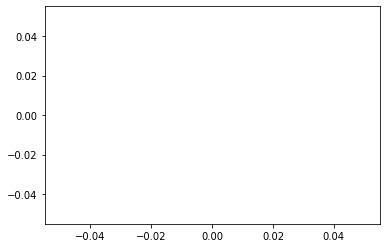

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('font', family="NanumBarunGothic")

def movie_compare(review_lists):
  count = 1
  x = []
  y = []
  for movie, review_list in review_lists:
    x.append(count)
    summary = get_summary(review_list)
    summary = summary[summary['Score'] > 0.8]
    y.append(summary['Star'].mean())
    count += 1
  plt.bar(x, y)
  plt.title('영화 별점 비교', fontproperties=fontprop)
  plt.xlabel('영화 번호', fontproperties=fontprop)
  plt.ylabel('신뢰성 별점 평균', fontproperties=fontprop)
  plt.show()
movie_compare(review_lists)